In [4]:
from sklearn.metrics import accuracy_score, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# XGBoost

In [5]:
train_dataset = pd.read_csv("train.csv").convert_dtypes()
test_dataset =pd.read_csv("test.csv").convert_dtypes()

In [6]:
categorical_columns = ['promotion', 'brand', 'manufacturer', 'category1', 'category2', 'category3']

# Option 1: Convert in the original datasets
train_dataset[categorical_columns] = train_dataset[categorical_columns].astype('category')
test_dataset[categorical_columns] = test_dataset[categorical_columns].astype('category')

In [7]:
features = ['itemID',
 'qty_sold_lag1',
 'qty_sold_lag2',
 'qty_sold_lag3',
 'qty_sold_lag7',
 # 'sales_value',
 'promotion',
 'maxItemPrice',
 'minItemPrice',
 'PricePerEach',
 'PricePerEachToday',
 'medianDiscPerc',
 'brand',
 'manufacturer',
 'customerRating',
 'category1',
 'category2',
 'category3',
 'recommendedRetailPrice',
 'weekDay',
 'day',
 'weekOfMonth',
 'harmonic_0',
 'harmonic_1',
 'harmonic_2',
 'harmonic_3',
 'harmonic_4',
 'cum_sum_order',
 'rolling_qty_sold_mean',
 'rolling_qty_sold_std',
 'rolling_qty_sold_median',
 'random_noise1',
 'random_noise2']
X_train = train_dataset[features]
X_test = test_dataset[features]
y_train = train_dataset["qty_sold"]
y_test = test_dataset["qty_sold"]

In [8]:
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [9]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'random_state': 42
}
n=50
model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)

C:\Users\domin\miniconda3\envs\summer-school-2025-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:26:10] WARNING: D:\bld\xgboost-split_1748292846627\work\src\learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [10]:
preds = model.predict(xgb_test)
preds = np.round(preds)
accuracy = accuracy_score(y_test, preds)
xgb_r2_score = r2_score(y_test, preds)
print('Accuracy of the model is:', accuracy*100)
print("R2 score of the model is:", xgb_r2_score)

Accuracy of the model is: 66.97066101095793
R2 score of the model is: 0.7157320976257324


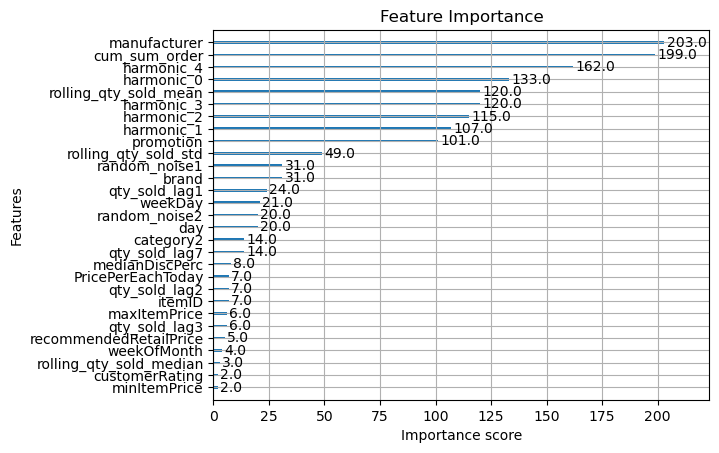

In [11]:
# Feature importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=5, random_state=42)
regr.fit(X_train, y_train)
regr_r2_score = regr.score(X_test, y_test)
print("R2 score of the model is:", regr_r2_score)